<a href="https://colab.research.google.com/github/sathwikap03/AN-E-COMMERCE-COMPANY-S-PATH-TO-SUSTAINABLE-GROWTH/blob/main/google_app_installs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/googleplaystore.csv")

In [3]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [4]:
df = df.dropna(subset=['App','Category','Rating','Reviews','Installs','Type'])


In [5]:
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [7]:
def convert_reviews(x):
    x = str(x).strip()
    if x.endswith('M'):
        return int(float(x[:-1]) * 1_000_000)
    elif x.endswith('K'):
        return int(float(x[:-1]) * 1_000)
    elif x.isnumeric():
        return int(x)
    else:
        return np.nan

In [8]:
df['Reviews'] = df['Reviews'].apply(convert_reviews)
df = df.dropna(subset=['Reviews'])
df['Reviews'] = df['Reviews'].astype(int)

In [9]:
df['Installs'] = (
    df['Installs']
    .str.replace('+', '', regex=False)
    .str.replace(',', '', regex=False)
)

In [10]:
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(int)

In [11]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.loc[df['Type'] == 'Free', 'Price'] = 0.0


In [12]:
def size_to_mb(x):
    if x.endswith('M'):
        return float(x[:-1])
    elif x.endswith('k') or x.endswith('K'):
        return float(x[:-1]) / 1024
    elif x == 'Varies with device':
        return np.nan
    else:
        return np.nan

In [13]:
df['Size'] = df['Size'].apply(size_to_mb)
df['Size'] = df['Size'].fillna(df['Size'].median())

In [14]:
df = df.drop_duplicates(subset=['App'])

In [15]:
df['Category'] = df['Category'].str.upper().str.strip()
df['Genres'] = df['Genres'].str.title().str.strip()

In [16]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [46]:
# Fill Current Ver and Android Ver with mode (most frequent value)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

# Double-check
print(df.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Install_Bin       0
dtype: int64


In [47]:
# 1. Average rating
avg_rating = df['Rating'].mean()

In [48]:
# 2. Unique categories
unique_categories = df['Category'].nunique()

In [49]:
# 3. Distribution of app sizes
size_distribution = df['Size'].describe()

In [50]:
# 4. Free vs Paid apps
free_vs_paid = df['Type'].value_counts()

In [51]:
# 5. Most common content rating
most_common_content = df['Content Rating'].mode()[0]

In [52]:
# 6. Top 5 most installed apps
top_5_installed = df.sort_values(by='Installs', ascending=False).head(5)[['App','Installs']]

In [53]:
# 7. Apps with rating >= 4.0
apps_above_4 = df[df['Rating'] >= 4.0].shape[0]

In [54]:
# 8. Avg number of reviews free vs paid
avg_reviews_free_paid = df.groupby('Type')['Reviews'].mean()

In [55]:
# 9. Avg app size per category
avg_size_category = df.groupby('Category')['Size'].mean()

In [56]:
# 10. Apps last updated in 2018
apps_2018 = df[df['Last Updated'].dt.year == 2018].shape[0]

In [57]:
# Print Results
print("1. Average rating:", avg_rating)
print("2. Unique categories:", unique_categories)
print("3. Size distribution:\n", size_distribution)
print("4. Free vs Paid:\n", free_vs_paid)
print("5. Most common content rating:", most_common_content)
print("6. Top 5 most installed apps:\n", top_5_installed)
print("7. Apps with rating >= 4.0:", apps_above_4)
print("8. Avg reviews free vs paid:\n", avg_reviews_free_paid)
print("9. Avg app size per category:\n", avg_size_category)
print("10. Apps last updated in 2018:", apps_2018)

1. Average rating: 4.173243045387993
2. Unique categories: 33
3. Size distribution:
 count    8196.000000
mean       20.648094
std        21.217538
min         0.008301
25%         5.800000
50%        14.000000
75%        27.000000
max       100.000000
Name: Size, dtype: float64
4. Free vs Paid:
 Type
Free    7592
Paid     604
Name: count, dtype: int64
5. Most common content rating: Everyone
6. Top 5 most installed apps:
                     App    Installs
2808      Google Photos  1000000000
2544           Facebook  1000000000
152   Google Play Books  1000000000
865   Google Play Games  1000000000
2554            Google+  1000000000
7. Apps with rating >= 4.0: 6286
8. Avg reviews free vs paid:
 Type
Free    274689.895416
Paid     10919.483444
Name: Reviews, dtype: float64
9. Avg app size per category:
 Category
ART_AND_DESIGN         12.806557
AUTO_AND_VEHICLES      20.508168
BEAUTY                 15.333333
BOOKS_AND_REFERENCE    14.138989
BUSINESS               13.944558
COMICS     

In [58]:
#Medium-Level Questions:
# 1. Correlation between installs and rating
corr = df['Installs'].corr(df['Rating'])
print("1. Correlation between Installs and Rating:", corr)

1. Correlation between Installs and Rating: 0.0401433728913082


In [59]:
# 2. Categories with highest average rating
avg_rating_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("\n2. Categories with highest average rating:\n", avg_rating_category.head(10))


2. Categories with highest average rating:
 Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
Name: Rating, dtype: float64


In [60]:
# 3. Effect of price on rating (paid apps only)
price_rating = df[df['Price'] > 0].groupby('Price')['Rating'].mean()
print("\n3. Average rating by Price (paid apps):\n", price_rating.head(10))


3. Average rating by Price (paid apps):
 Price
0.99    4.298077
1.00    4.450000
1.20    4.200000
1.29    4.100000
1.49    4.196774
1.50    4.200000
1.59    4.500000
1.61    4.200000
1.70    4.300000
1.75    5.000000
Name: Rating, dtype: float64


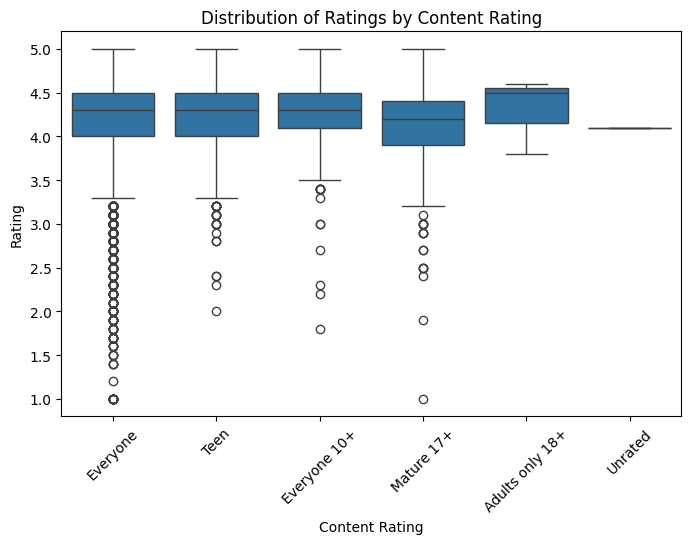

In [61]:
# 4. Distribution of ratings across content ratings (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Ratings by Content Rating")
plt.show()

In [62]:
# 5. Genres with most apps over 1M installs
high_install_genres = df[df['Installs'] > 1_000_000].groupby('Genres')['App'].count().sort_values(ascending=False)
print("\n5. Genres with most apps >1M installs:\n", high_install_genres.head(10))


5. Genres with most apps >1M installs:
 Genres
Tools            172
Action           128
Photography      123
Communication     99
Productivity      91
Entertainment     83
Arcade            81
Sports            79
Shopping          72
Social            67
Name: App, dtype: int64


In [63]:
# 6. Frequency of updates (average days between updates per app)
df_sorted = df.sort_values(['App','Last Updated'])
df_sorted['Prev Update'] = df_sorted.groupby('App')['Last Updated'].shift(1)
df_sorted['Update Gap'] = (df_sorted['Last Updated'] - df_sorted['Prev Update']).dt.days
avg_update_gap = df_sorted['Update Gap'].mean()
print("\n6. Average time between updates (days):", avg_update_gap)


6. Average time between updates (days): nan


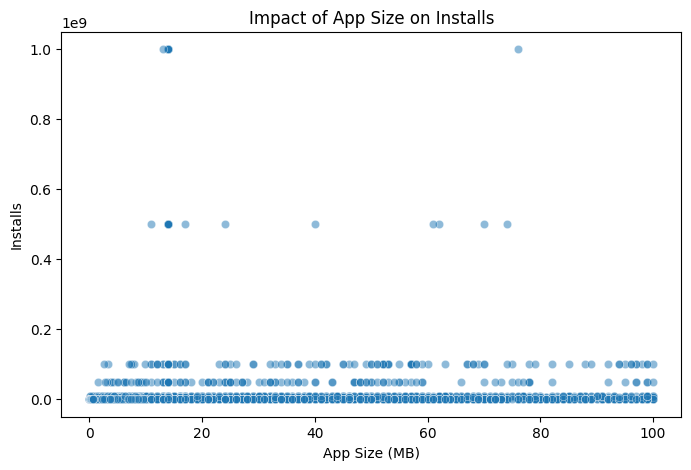

In [64]:
# 7. Impact of size on installs (scatter plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Installs', data=df, alpha=0.5)
plt.title("Impact of App Size on Installs")
plt.xlabel("App Size (MB)")
plt.ylabel("Installs")
plt.show()


In [65]:
# 8. Apps with highest reviews and their ratings
top_reviewed_apps = df.sort_values(by='Reviews', ascending=False).head(10)[['App','Reviews','Rating']]
print("\n8. Top 10 apps with highest reviews:\n", top_reviewed_apps)


8. Top 10 apps with highest reviews:
                                                     App   Reviews  Rating
2544                                           Facebook  78158306     4.1
336                                  WhatsApp Messenger  69119316     4.4
2545                                          Instagram  66577313     4.5
335            Messenger – Text and Video Chat for Free  56642847     4.0
1670                                     Clash of Clans  44891723     4.6
4005            Clean Master- Space Cleaner & Antivirus  42916526     4.7
1654                                     Subway Surfers  27722264     4.5
3665                                            YouTube  25655305     4.3
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999     4.7
1660                                       Clash Royale  23133508     4.6


In [66]:
# 9. Content rating distribution: free vs paid apps
content_vs_type = pd.crosstab(df['Content Rating'], df['Type'])
print("\n9. Content rating distribution (Free vs Paid):\n", content_vs_type)


9. Content rating distribution (Free vs Paid):
 Type             Free  Paid
Content Rating             
Adults only 18+     3     0
Everyone         6105   513
Everyone 10+      274    31
Mature 17+        342    15
Teen              867    45
Unrated             1     0


In [67]:
# 10. Top 5 categories with most installs
top_categories_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)
print("\n10. Top 5 categories with most installs:\n", top_categories_installs)


10. Top 5 categories with most installs:
 Category
GAME             13878762717
COMMUNICATION    11038241530
TOOLS             7999724500
PRODUCTIVITY      5793070180
SOCIAL            5487841475
Name: Installs, dtype: int64


In [68]:
#Advanced Level Questions
# 1. Top 10 apps with highest ratings
top_rated_apps = df.sort_values(by=['Rating','Reviews','Installs'],
                                ascending=[False, False, False]).head(10)[['App','Rating','Reviews','Installs']]
print("1. Top 10 highest-rated apps with reviews & installs:\n", top_rated_apps)


1. Top 10 highest-rated apps with reviews & installs:
                                                      App  Rating  Reviews  \
10357                                         Ríos de Fe     5.0      141   
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)     5.0      104   
8058                                          Oración CX     5.0      103   
6823                      Barisal University App-BU Face     5.0      100   
9496                                          Master E.K     5.0       90   
7506                                             CL REPL     5.0       47   
5230                                              AJ Cam     5.0       44   
7842                         CS & IT Interview Questions     5.0       43   
9517                                             Ek Vote     5.0       43   
5196    AI Today : Artificial Intelligence News & AI 101     5.0       43   

       Installs  
10357      1000  
10301      1000  
8058       5000  
6823       1000  
9496   

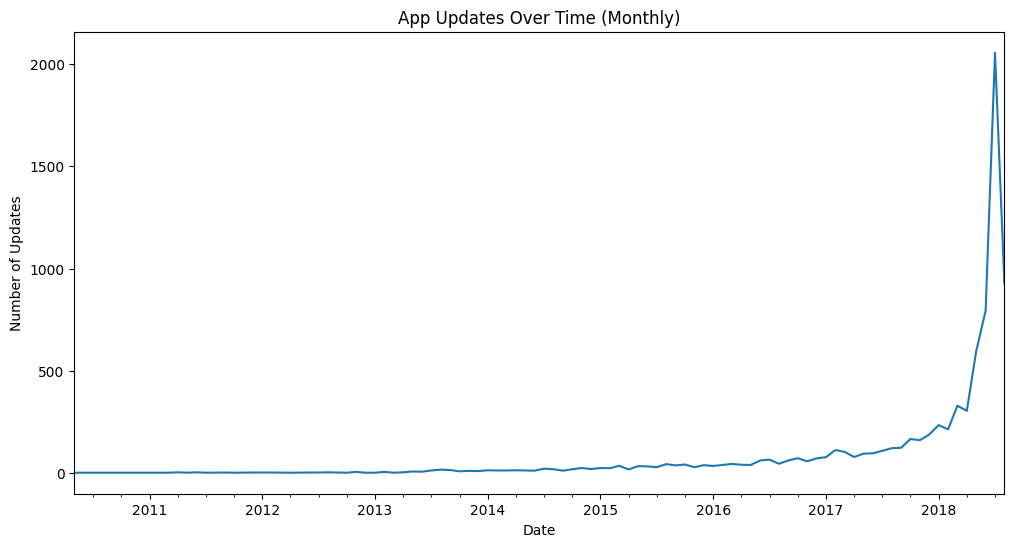

In [69]:
# 2. Trend of app updates over time
updates_over_time = df['Last Updated'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12,6))
updates_over_time.plot(kind='line')
plt.title("App Updates Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Updates")
plt.show()


3. Average rating per installs bin:
 Install_Bin
<1K         4.198129
1K-10K      4.031303
10K-100K    4.095422
100K-1M     4.203804
1M-10M      4.271049
10M+        4.353456
Name: Rating, dtype: float64


/tmp/ipython-input-115713239.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_installs = df.groupby('Install_Bin')['Rating'].mean()


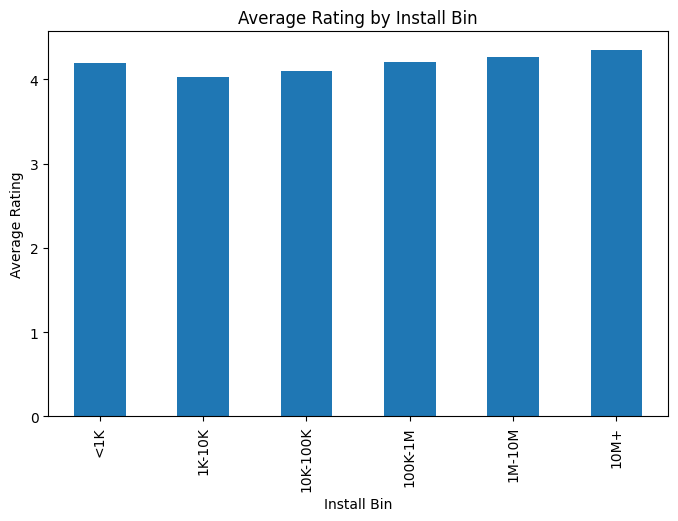

In [70]:
# 3. Average rating vs number of installs (binned analysis)
# Define bins
bins = [0, 1000, 10000, 100000, 1000000, 10000000, df['Installs'].max()]
labels = ['<1K','1K-10K','10K-100K','100K-1M','1M-10M','10M+']
df['Install_Bin'] = pd.cut(df['Installs'], bins=bins, labels=labels, include_lowest=True)

rating_by_installs = df.groupby('Install_Bin')['Rating'].mean()
print("\n3. Average rating per installs bin:\n", rating_by_installs)

plt.figure(figsize=(8,5))
rating_by_installs.plot(kind='bar')
plt.title("Average Rating by Install Bin")
plt.xlabel("Install Bin")
plt.ylabel("Average Rating")
plt.show()

In [71]:
# 4. Sentiment analysis on reviews (if review text available)
# Assume df_reviews with ['App','Review','Sentiment'] exists
# Example using TextBlob
"""
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df_reviews['Sentiment'] = df_reviews['Review'].apply(get_sentiment)

# Compare sentiment distribution for high vs low rated apps
high_rated = df_reviews[df_reviews['Rating'] >= 4.5]['Sentiment'].value_counts(normalize=True)
low_rated = df_reviews[df_reviews['Rating'] <= 2.5]['Sentiment'].value_counts(normalize=True)

print("\n4. Sentiment distribution (high-rated apps):\n", high_rated)
print("\n4. Sentiment distribution (low-rated apps):\n", low_rated)
"""
# If no review text exists, skip this step

'\nfrom textblob import TextBlob\n\ndef get_sentiment(text):\n    analysis = TextBlob(str(text))\n    if analysis.sentiment.polarity > 0:\n        return \'Positive\'\n    elif analysis.sentiment.polarity == 0:\n        return \'Neutral\'\n    else:\n        return \'Negative\'\n\ndf_reviews[\'Sentiment\'] = df_reviews[\'Review\'].apply(get_sentiment)\n\n# Compare sentiment distribution for high vs low rated apps\nhigh_rated = df_reviews[df_reviews[\'Rating\'] >= 4.5][\'Sentiment\'].value_counts(normalize=True)\nlow_rated = df_reviews[df_reviews[\'Rating\'] <= 2.5][\'Sentiment\'].value_counts(normalize=True)\n\nprint("\n4. Sentiment distribution (high-rated apps):\n", high_rated)\nprint("\n4. Sentiment distribution (low-rated apps):\n", low_rated)\n'


5. Genre ratings (mean, median, count):
                                  mean  median  count
Genres                                              
Board;Pretend Play           4.800000     4.8      1
Comics;Creativity            4.800000     4.8      1
Health & Fitness;Education   4.700000     4.7      1
Adventure;Brain Games        4.600000     4.6      1
Puzzle;Education             4.600000     4.6      1
Strategy;Action & Adventure  4.600000     4.6      2
Entertainment;Creativity     4.533333     4.6      3
Music;Music & Video          4.533333     4.6      3
Strategy;Education           4.500000     4.5      1
Arcade;Pretend Play          4.500000     4.5      1


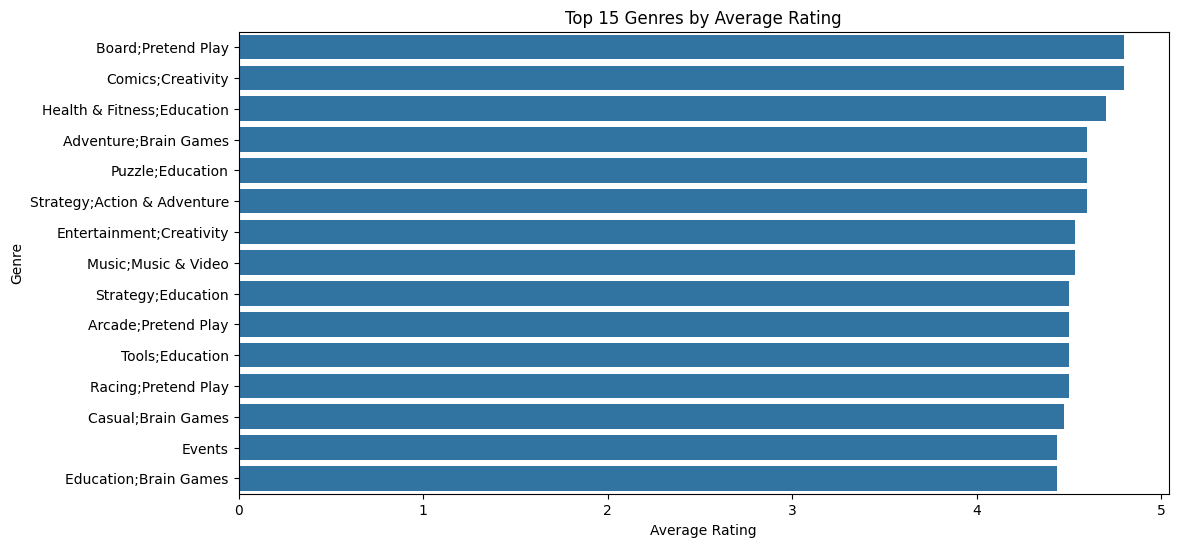

In [72]:
# 5. Relationship between genre and ratings
genre_ratings = df.groupby('Genres')['Rating'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)
print("\n5. Genre ratings (mean, median, count):\n", genre_ratings.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y=genre_ratings.index[:15], data=genre_ratings.head(15).reset_index())
plt.title("Top 15 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

In [73]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Install_Bin       0
dtype: int64


In [75]:
# Save as CSV
df.to_csv('/content/cleaned_googleplaystore.csv', index=False)

